# Sentiment analysis for tweets (1 Workshop AI)
#### Maicol Carvajal - Cristian Velasco - Bryan Bohorquez - Camilo Ocampo

### Using the next dataset we want to analyze sentiments: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset?resource=download

## Self made questions:
#### Which feeling predominate in the whole dataset?
#### More than the 30% of the tweets contain negative sentiments?
#### Which model can get a higher accuracy / precission? (Between logistic regression and LSTM)
#### Which is the word most used and which are the least used?

## Importing pandas to get the dataset

In [1]:
import pandas as pd

## Uploading data and looking up the structure

In [2]:
df = pd.read_csv("Files/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


#### We got a dataset that contains 4 columns: 
##### * An id
##### * The complete review
##### * Selected text (that show us the relation with the sentiment) 
##### * And finally the sentiment: the value that we are going to work on

## Cleaning data (preprocessing)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,6f7127d9d7,All this flirting going on - The ATG smiles...,good,neutral
freq,1,1,199,11118


In [5]:
nulls = df.loc[df.isnull().any(axis=1)] # Checking out if we have null data, axis = 1 checks column by column
nulls

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [6]:
# As we can see, the row 314 contains null content, we are going to delete it, (avoid data noise)
df.loc[314,:]

textID           fdb77c3752
text                    NaN
selected_text           NaN
sentiment           neutral
Name: 314, dtype: object

In [7]:
# Deleting the index 314 from df
df = df.drop(314)

In [8]:
# Checking again if we have null values
nulls = df.loc[df.isnull().any(axis=1)]
nulls # Empty: we got the dataset with values in every row

,textID,text,selected_text,sentiment


## Cleaning more data

### Wordcloud for the stopwords in the df

#### Imports and values

In [9]:
# pip install nltk
# pip install wordcloud


import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords


nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
whole_text = ' '.join(text for text in df['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Camilo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Print the wordcloud

Here you can see all the Stopwords in the df[text]


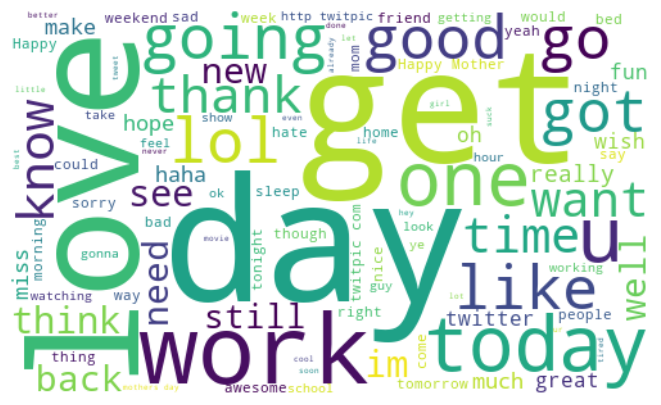

In [10]:
# Wordcloud parameters
ourcloud = WordCloud(stopwords=stop_words,
                     background_color="white",
                     max_words=100,
                     width=500,
                     height=300).generate(whole_text)

print('Here you can see all the Stopwords in the df[text]')
plt.figure(figsize=(10, 5))
plt.imshow(ourcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Without more spaces / stopwords / mayus / special characters

In [11]:
def minusAndSpecialCharacteres(df):

    def clean_text(text):
        if isinstance(text, str):
            text = text.lower()
            text = re.sub(r'[^a-z0-9\s]', '', text)  # special characters
            text = re.sub(r'\s+', ' ', text)  # if there are more spaces than one, it clears it
            text = text.strip()  # no spaces at the beggining or the end
            text = ' '.join([word for word in text.split() if word not in stop_words]) # Replace stopwords for ' '
        return text

    # Here we ask to the functions that's is inside to change the values in the text column for them that it is supposed to give
    df['text'] = df['text'].apply(clean_text)
    df['selected_text'] = df['selected_text'].apply(clean_text)
    return df

# Use the function that by its self calls the other one to make the changes that we wanna
df = minusAndSpecialCharacteres(df)
df # Actually works as we wait :D

,textID,text,selected_text,sentiment
0,cb774db0d1,id responded going,id responded going,neutral
1,549e992a42,sooo sad miss san diego,sooo sad,negative
2,088c60f138,boss bullying,bullying,negative
3,9642c003ef,interview leave alone,leave alone,negative
4,358bd9e861,sons couldnt put releases already bought,sons,negative
...,...,...,...,...
27476,4eac33d1c0,wish could come see u denver husband lost job ...,lost,negative
27477,4f4c4fc327,ive wondered rake client made clear net dont f...,dont force,negative
27478,f67aae2310,yay good enjoy break probably need hectic week...,yay good,positive
27479,ed167662a5,worth,worth,positive


### Tokenization process